In [1]:
import magic
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")

In [3]:
import anndata

In [4]:
adata = anndata.read_h5ad("ac9c13da-7134-4d09-8086-d0933cbdba41.h5ad")

In [ ]:
adata = adata[(
    (adata.obs['nFeature_RNA'] > 300) &
    (adata.obs['nCount_RNA'] > 500) &
    (adata.obs['percent_mt'] < 10)
), :]

In [6]:
adata

View of AnnData object with n_obs × n_vars = 25680 × 21946
    obs: 'nCount_RNA', 'nFeature_RNA', 'Lane', 'demux_doublet_call', 'demux_RD_TOTL', 'demux_RD_PASS', 'demux_RD_UNIQ', 'demux_N_SNP', 'demux_PRB_DBL', 'percent_mt', 'scrub_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'norm_library_size', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'pair_index_CW', 'live_cells', 'dead_cells', 'pct_alive', 'MY_MTX', 'MY_bDMARD', 'MY_pt_global', 'MY_md_global', 'MY_tjc', 'MY_sjc', 'MY_esr', 'MY_crp', 'MY_cdai', 'MY_das28esr4', 'MY_das28crp4', 'MY_RF_status', 'MY_CCP_Status', 'activity_python_crp', 'activity_python_binary_crp', 'activity_python_esr', 'activity_python_binary_esr', 'leiden_r3.0', 'rough_annot', 'fine_annot', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id',

Initialize MAGIC

In [7]:
magic_op = magic.MAGIC()

In [8]:
X_magic = magic_op.fit_transform(adata.copy(), genes="all_genes")

Calculating MAGIC...
  Running MAGIC on 25680 cells and 21946 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 26.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 79.52 seconds.
    Calculating affinities...
    Calculated affinities in 86.77 seconds.
  Calculated graph and diffusion operator in 192.87 seconds.
  Running MAGIC with `solver='exact'` on 21946-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 59.26 seconds.
Calculated MAGIC in 253.52 seconds.


In [9]:
sc.pp.calculate_qc_metrics(X_magic, inplace=True)

In [10]:
X_magic

AnnData object with n_obs × n_vars = 25680 × 21946
    obs: 'nCount_RNA', 'nFeature_RNA', 'Lane', 'demux_doublet_call', 'demux_RD_TOTL', 'demux_RD_PASS', 'demux_RD_UNIQ', 'demux_N_SNP', 'demux_PRB_DBL', 'percent_mt', 'scrub_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'norm_library_size', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'pair_index_CW', 'live_cells', 'dead_cells', 'pct_alive', 'MY_MTX', 'MY_bDMARD', 'MY_pt_global', 'MY_md_global', 'MY_tjc', 'MY_sjc', 'MY_esr', 'MY_crp', 'MY_cdai', 'MY_das28esr4', 'MY_das28crp4', 'MY_RF_status', 'MY_CCP_Status', 'activity_python_crp', 'activity_python_binary_crp', 'activity_python_esr', 'activity_python_binary_esr', 'leiden_r3.0', 'rough_annot', 'fine_annot', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_r

In [11]:
X_magic, adata

(AnnData object with n_obs × n_vars = 25680 × 21946
     obs: 'nCount_RNA', 'nFeature_RNA', 'Lane', 'demux_doublet_call', 'demux_RD_TOTL', 'demux_RD_PASS', 'demux_RD_UNIQ', 'demux_N_SNP', 'demux_PRB_DBL', 'percent_mt', 'scrub_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'norm_library_size', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'pair_index_CW', 'live_cells', 'dead_cells', 'pct_alive', 'MY_MTX', 'MY_bDMARD', 'MY_pt_global', 'MY_md_global', 'MY_tjc', 'MY_sjc', 'MY_esr', 'MY_crp', 'MY_cdai', 'MY_das28esr4', 'MY_das28crp4', 'MY_RF_status', 'MY_CCP_Status', 'activity_python_crp', 'activity_python_binary_crp', 'activity_python_esr', 'activity_python_binary_esr', 'leiden_r3.0', 'rough_annot', 'fine_annot', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self

In [12]:
X_magic.obsm = adata.obsm

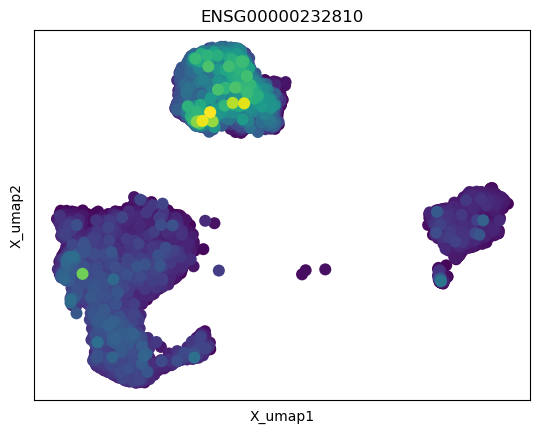

In [13]:
sc.pl.embedding(X_magic, basis="X_umap", color=["ENSG00000232810"], ncols=5, s=300, colorbar_loc=None)

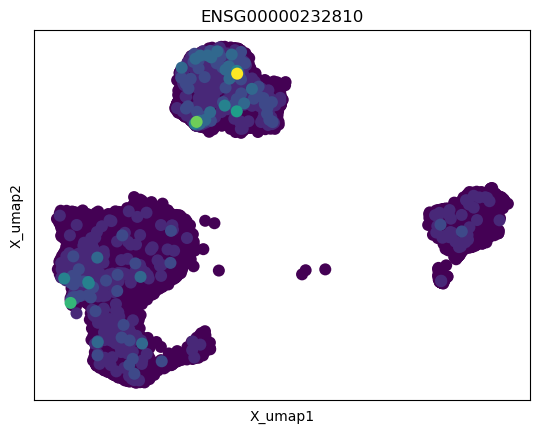

In [14]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pl.embedding(adata, basis="X_umap", color=["ENSG00000232810"], ncols=5, s=300, colorbar_loc=None)

In [32]:
print(X_magic.obs.columns)

Index(['nCount_RNA', 'nFeature_RNA', 'Lane', 'demux_doublet_call',
       'demux_RD_TOTL', 'demux_RD_PASS', 'demux_RD_UNIQ', 'demux_N_SNP',
       'demux_PRB_DBL', 'percent_mt', 'scrub_doublets', 'batch',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'pct_counts_hb', 'n_genes', 'n_counts', 'norm_library_size', 'S_score',
       'G2M_score', 'phase', 'cell_cycle_diff', 'pair_index_CW', 'live_cells',
       'dead_cells', 'pct_alive', 'MY_MTX', 'MY_bDMARD', 'MY_pt_global',
       'MY_md_global', 'MY_tjc', 'MY_sjc', 'MY_esr', 'MY_crp', 'MY_cdai',
       'MY_das28esr4', 'MY_das28crp4', 'MY_RF_status', 'MY_CCP_Status',
       'activity_python_crp', 'activity_python_binary_crp',
       'activity_python_esr', 'activity_python_binary_esr', 'leiden_r3.0',
       'rough_annot', 'fine_annot', 'organism_ontology_term_id',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id

In [34]:
desired_columns = ['nCount_RNA', 'nFeature_RNA', 'percent_mt', 'rough_annot',  'fine_annot', 'donor_id', 'sex', 'disease']
XMagic_subset = X_magic.obs[desired_columns].copy()

In [35]:
X_magic.obs = XMagic_subset

In [36]:
print(X_magic.obs.columns)

Index(['nCount_RNA', 'nFeature_RNA', 'percent_mt', 'rough_annot', 'fine_annot',
       'donor_id', 'sex', 'disease'],
      dtype='object')


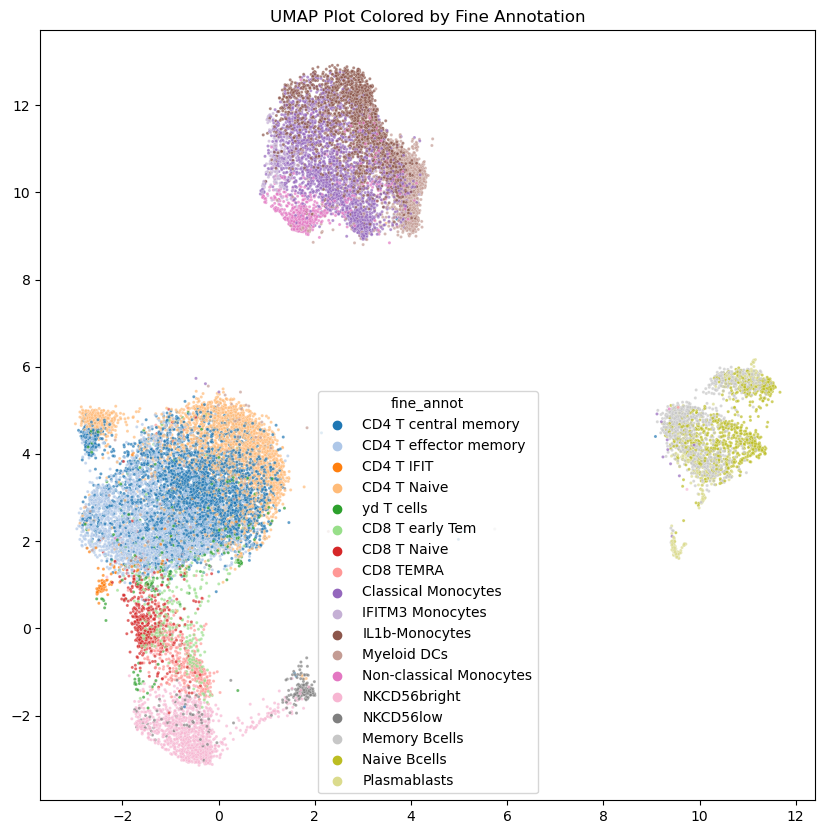

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_magic.obsm['X_umap'][:, 0], y=X_magic.obsm['X_umap'][:, 1], 
                hue=X_magic.obs['fine_annot'], palette='tab20', 
                alpha=0.7, s=5)
plt.title('UMAP Plot Colored by Fine Annotation')
plt.show()

In [38]:
X_magic.write_h5ad('MAGIC_RA.h5ad')

In [39]:
magic_ann = anndata.read_h5ad("MAGIC_RA.h5ad")

In [40]:
magic_ann.obs

,nCount_RNA,nFeature_RNA,percent_mt,rough_annot,fine_annot,donor_id,sex,disease
barcodes,,,,,,,,
GCAACATAGTTGCGCC-11,562,207,6.761566,Monocytes,Myeloid DCs,Control17_1_C_M,male,normal
CGTGCTTCATGTCGTA-4,505,299,3.168317,Monocytes,Myeloid DCs,RA01_1_A_M,male,rheumatoid arthritis
ATCGATGTCGTGGGTC-12,503,295,8.548708,CD8Tcells,CD8 TEMRA,RA18_1_C_F,female,rheumatoid arthritis
GACAGCCTCTCCGAAA-12,536,210,7.276119,Monocytes,Myeloid DCs,RA21_1_H_F,female,rheumatoid arthritis
AGCGTCGGTCACAATC-12,529,206,8.506616,Monocytes,Myeloid DCs,RA16_1_C_M,male,rheumatoid arthritis
...,...,...,...,...,...,...,...,...
CACAACACAAAGGATT-1,1545,781,7.313916,Monocytes,Classical Monocytes,Control05_1_C_M,male,normal
ACTTATCTCGTCCTCA-2,1851,973,4.808212,Monocytes,IL1b-Monocytes,RA07_1_C_F,female,rheumatoid arthritis
TGGATCAAGTAAACTG-2,1009,686,3.072349,Bcells,Memory Bcells,Control07_1_C_F,female,normal


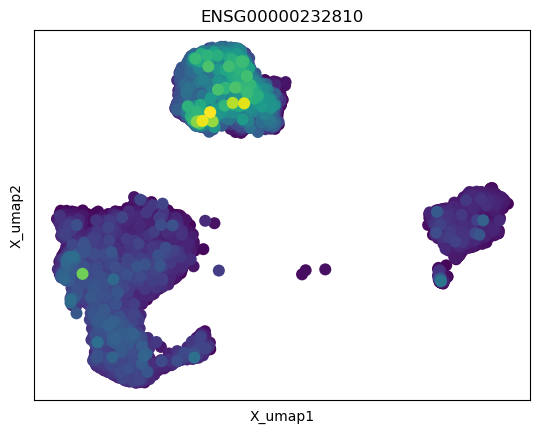

In [41]:
sc.pl.embedding(magic_ann, basis="X_umap", color=["ENSG00000232810"], ncols=5, s=300, colorbar_loc=None)

In [44]:
unique_annotations = magic_ann.obs['fine_annot'].unique()

<Figure size 800x800 with 0 Axes>

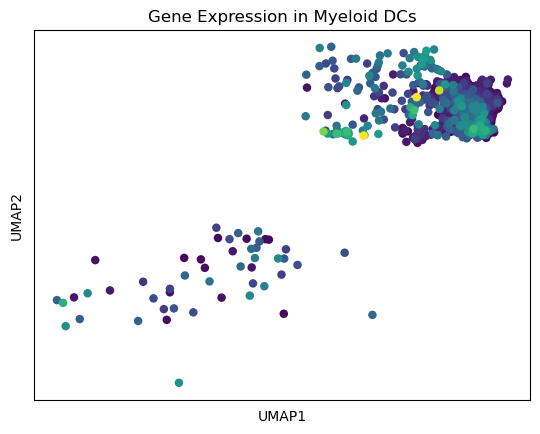

<Figure size 800x800 with 0 Axes>

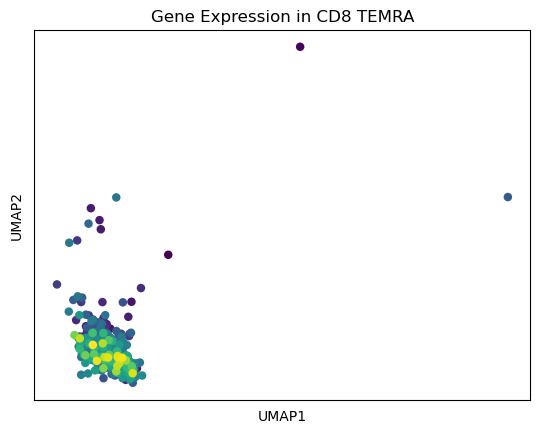

<Figure size 800x800 with 0 Axes>

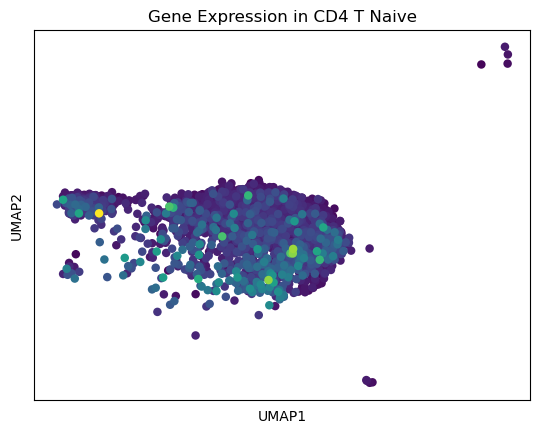

<Figure size 800x800 with 0 Axes>

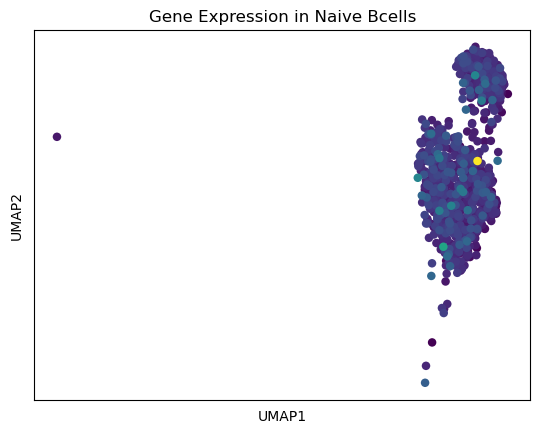

<Figure size 800x800 with 0 Axes>

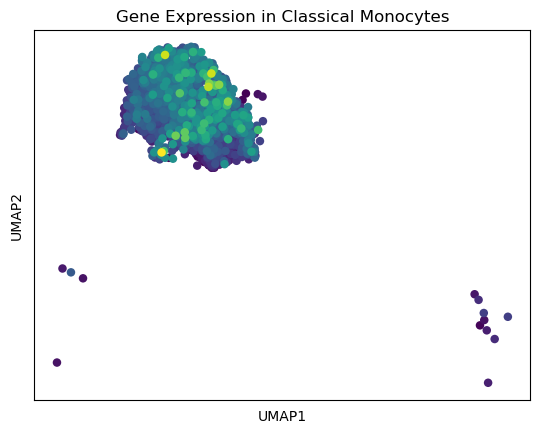

<Figure size 800x800 with 0 Axes>

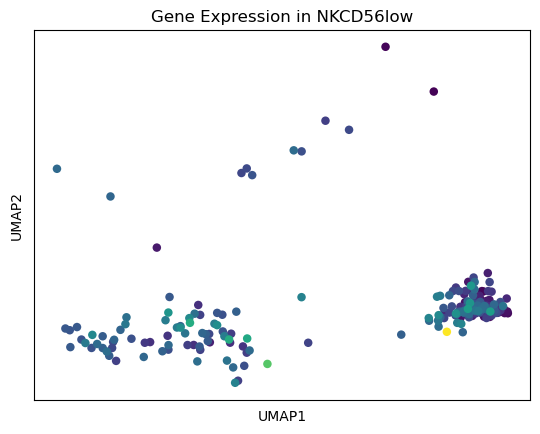

<Figure size 800x800 with 0 Axes>

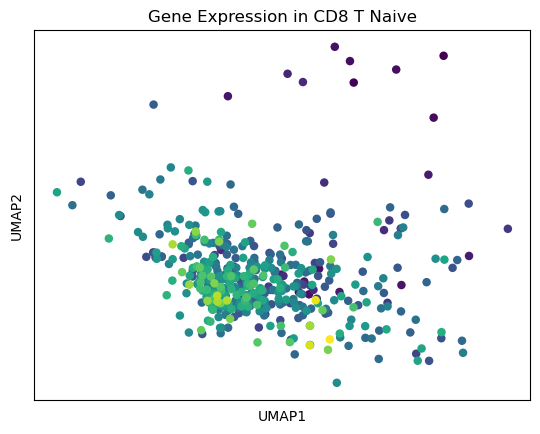

<Figure size 800x800 with 0 Axes>

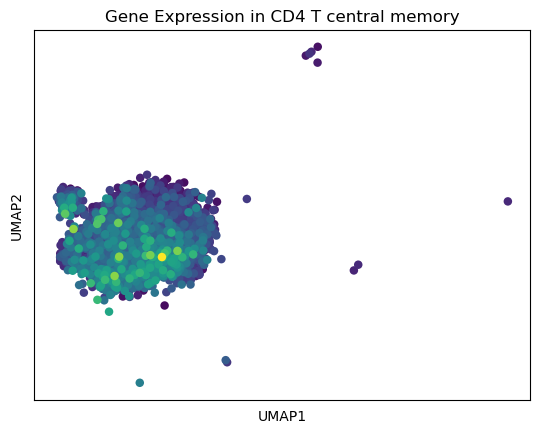

<Figure size 800x800 with 0 Axes>

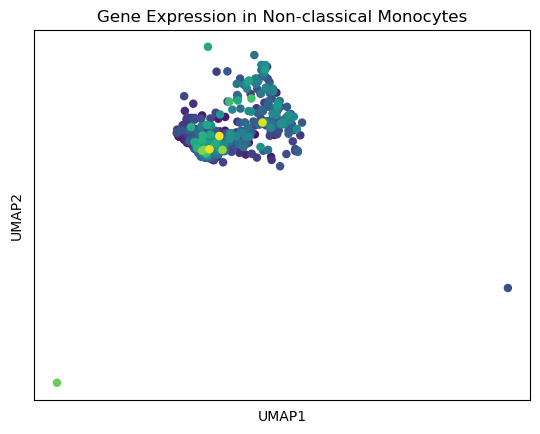

<Figure size 800x800 with 0 Axes>

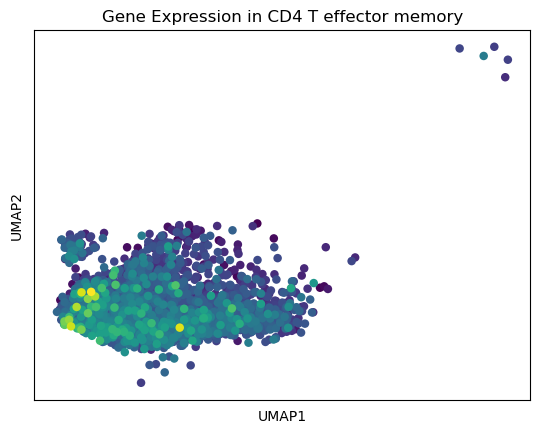

<Figure size 800x800 with 0 Axes>

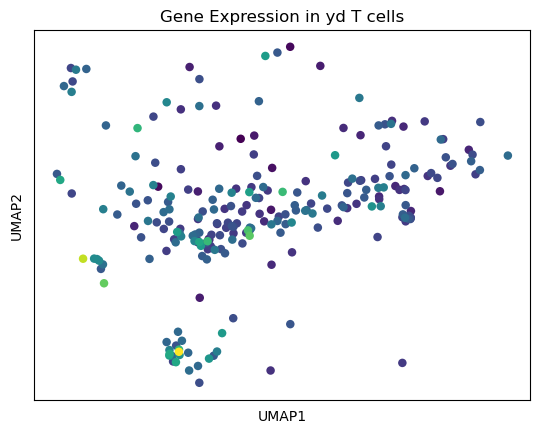

<Figure size 800x800 with 0 Axes>

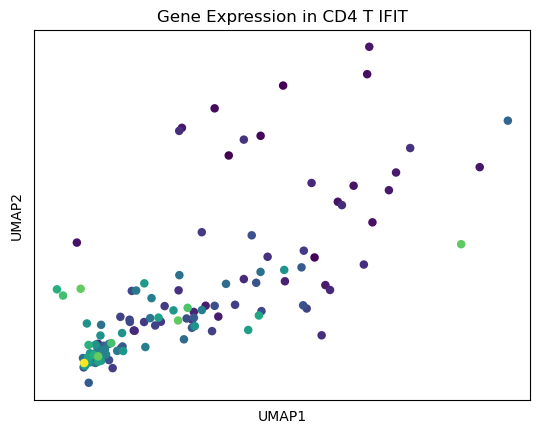

<Figure size 800x800 with 0 Axes>

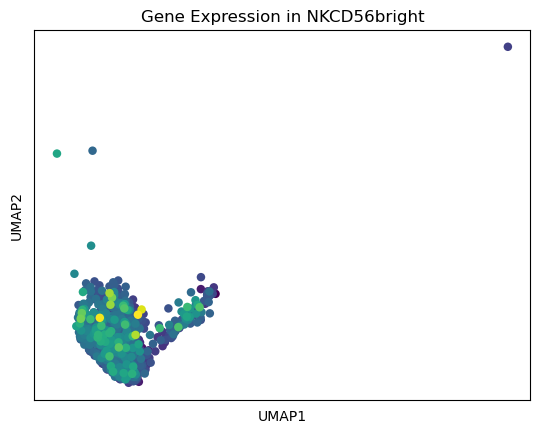

<Figure size 800x800 with 0 Axes>

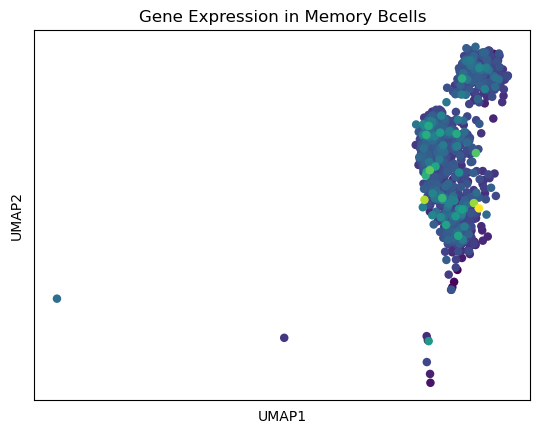

<Figure size 800x800 with 0 Axes>

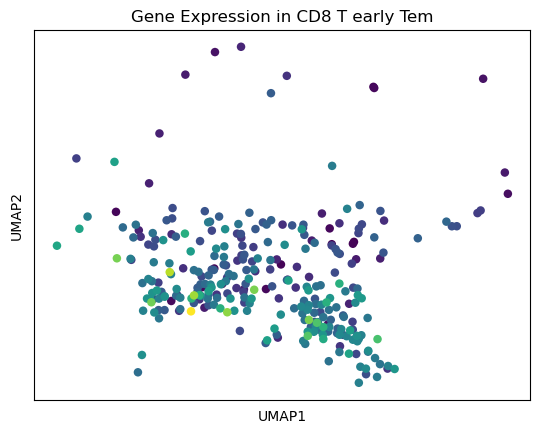

<Figure size 800x800 with 0 Axes>

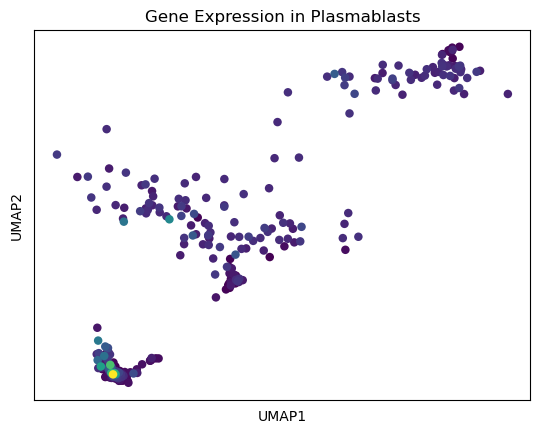

<Figure size 800x800 with 0 Axes>

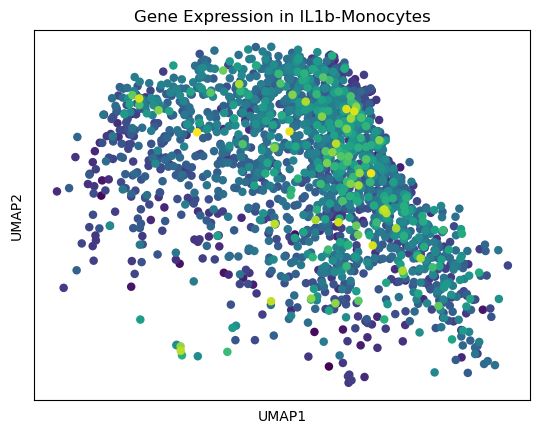

<Figure size 800x800 with 0 Axes>

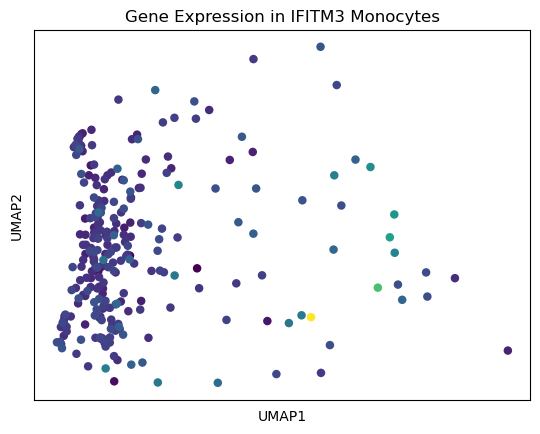

In [46]:
import scanpy as sc
import matplotlib.pyplot as plt

for annot in unique_annotations:
    subset = magic_ann[magic_ann.obs['fine_annot'] == annot]
    plt.figure(figsize=(8, 8))
    sc.pl.umap(subset, 
              color="ENSG00000232810", 
              s=150, 
              colorbar_loc=None, 
              title=f'Gene Expression in {annot}')
    plt.show()